In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
songs = pd.read_csv("data/songs.csv")
songs.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [3]:
songs.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [4]:
songs.describe().T

,count,mean,std,min,25%,50%,75%,max
acousticness,169909.0,0.493214,0.376627,0.0,0.0945,0.492000,0.8880,0.996
danceability,169909.0,0.538150,0.175346,0.0,0.4170,0.548000,0.6670,0.988
duration_ms,169909.0,231406.158973,121321.923219,5108.0,171040.0000,208600.000000,262960.0000,5403500.000
energy,169909.0,0.488593,0.267390,0.0,0.2630,0.481000,0.7100,1.000
explicit,169909.0,0.084863,0.278679,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,169909.0,0.161937,0.309329,0.0,0.0000,0.000204,0.0868,1.000
key,169909.0,5.200519,3.515257,0.0,2.0000,5.000000,8.0000,11.000
liveness,169909.0,0.206690,0.176796,0.0,0.0984,0.135000,0.2630,1.000
loudness,169909.0,-11.370289,5.666765,-60.0,-14.4700,-10.474000,-7.1180,3.855
mode,169909.0,0.708556,0.454429,0.0,0.0000,1.000000,1.0000,1.000


In [5]:
scaler = MinMaxScaler()
songs["loudness"] = scaler.fit_transform(songs["loudness"].values.reshape(-1, 1))

In [6]:
songs = songs.drop_duplicates(subset=["name", "artists"], keep="first")

In [7]:
explicit_perc = songs["explicit"].sum()/len(songs) * 100 
print("The percentage of explicit songs on Spotify is {explicit_perc}".format(explicit_perc = explicit_perc))

The percentage of explicit songs on Spotify is 8.690488353085412


In [8]:
fig = px.histogram(songs, x="popularity", hover_data=songs.columns)
fig.show()

In [9]:
songs.drop(songs[songs["popularity"] < 20].index, inplace=True, axis=0)
fig = px.histogram(songs, x="popularity", color="explicit")
fig.show()

In [10]:
song_atribs = songs.drop(['artists',
       'explicit', 'id', 'valence', 'year', 'name', 'mode', 'tempo', 'duration_ms', 'key', 'release_date', 'popularity'], inplace=False, axis=1)
song_atribs = song_atribs.replace(0, np.nan).dropna(axis=0, how='any')
song_atribs.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
1758,0.980,0.314,0.351,0.824000,0.0775,0.637961,0.0383
1760,0.995,0.609,0.340,0.884000,0.1950,0.633169,0.0752
1828,0.600,0.687,0.289,0.001350,0.0850,0.731673,0.0526
1830,0.770,0.708,0.453,0.000002,0.0686,0.750200,0.0727
1891,0.963,0.472,0.167,0.000002,0.2030,0.664662,0.0307


In [11]:
song_atribs = song_atribs.loc[(song_atribs["instrumentalness"] > 0.01)]

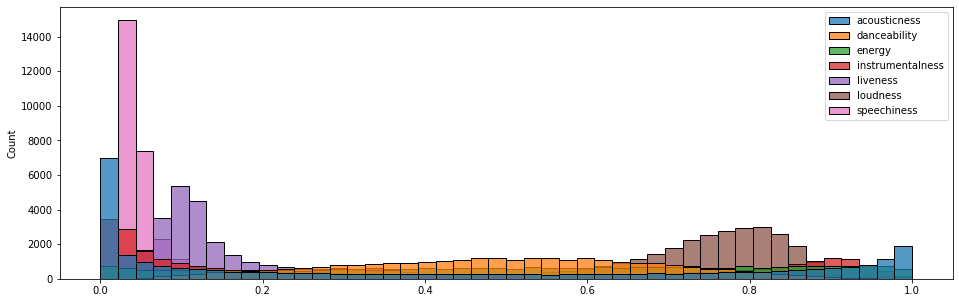

In [12]:
plt.figure(figsize=(16, 5))
sns.histplot(data=song_atribs, stat='count')
plt.show()